# CATS AND DOGS

In the proccess of this project we will discuss the quality of various Neural Network models to analyse and Classify a Dataset of 37 types of cat and dog races. This short study will be done using a Dataset provided by Oxford University called : Oxford-IIIT Pet Dataset. 

The project is divided in 5 different steps :

- Exploration of the Dataset
- Binary Classification between cats and dogs
- Classification between 37 cat and dog races
- Animal Segmentation
- Comparative Analyses

In [1]:
%load_ext autoreload
%autoreload 2

import random

import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [6]:
transform = torchvision.transforms.ToTensor()

train_dataset = torchvision.datasets.OxfordIIITPet(root='../Data', download=True, transform=transform)

100%|██████████| 792M/792M [00:18<00:00, 42.2MB/s] 
100%|██████████| 19.2M/19.2M [00:00<00:00, 21.2MB/s]


In [12]:
train_dataset

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: ../Data
    StandardTransform
Transform: ToTensor()

In [49]:
print(train_dataset.classes)
print(train_dataset.bin_classes)
print(train_dataset.class_to_idx)
print(train_dataset.bin_class_to_idx)

['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair', 'Chihuahua', 'Egyptian Mau', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu', 'Siamese', 'Sphynx', 'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']
['Cat', 'Dog']
{'Abyssinian': 0, 'American Bulldog': 1, 'American Pit Bull Terrier': 2, 'Basset Hound': 3, 'Beagle': 4, 'Bengal': 5, 'Birman': 6, 'Bombay': 7, 'Boxer': 8, 'British Shorthair': 9, 'Chihuahua': 10, 'Egyptian Mau': 11, 'English Cocker Spaniel': 12, 'English Setter': 13, 'German Shorthaired': 14, 'Great Pyrenees': 15, 'Havanese': 16, 'Japanese Chin': 17, 'Keeshond': 18, 'Leonberger': 19, 'Maine Coon': 20

In [48]:
print(train_dataset._labels[-1])
print(train_dataset._bin_labels[-1])

36
1


In [34]:
np.shape(train_dataset[0][0])

torch.Size([3, 500, 394])

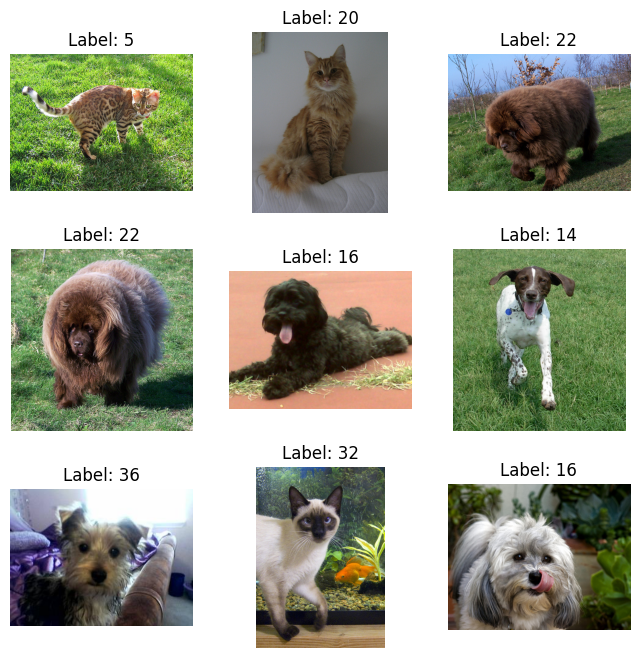

In [ ]:
# Plot 9 random images from the MNIST train dataset
def plot_images(img_dataset, RGB='True'):
    """Plots 9 random images from the given dataset

    Args:
        img_dataset (torch.utils.data.Dataset): The dataset to plot images from
    """
    # Set up a 3x3 grid for plotting 9 random images
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    
    # Plot 9 random images from the img_dataset
    for i in range(1, cols * rows + 1):
        random_idx = torch.randint(len(img_dataset), size=(1,)).item()  # Pick a random index
        img, label = img_dataset[random_idx]  # Get the image and its label
        figure.add_subplot(rows, cols, i)  # Add subplot
        plt.title(f'Label: {label}')  # Set title to show the label
        plt.axis("off")  # Turn off axis
        if RGB == 'True':
            plt.imshow(torch.permute(img.squeeze(),(1,2,0)))  # Plot image
        else:
            plt.imshow(img.squeeze())  # Plot image
    
    plt.show()  # Display the figure

plot_images(train_dataset)